In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import sys
sys.path.append('../')

from track1_baseline_faiss.parse_results import parse_result_file, find_latest_version

In [4]:
dsname = "text2image-10M"

# Results on IVFFlat indexes

This is to see how it performs without compression.

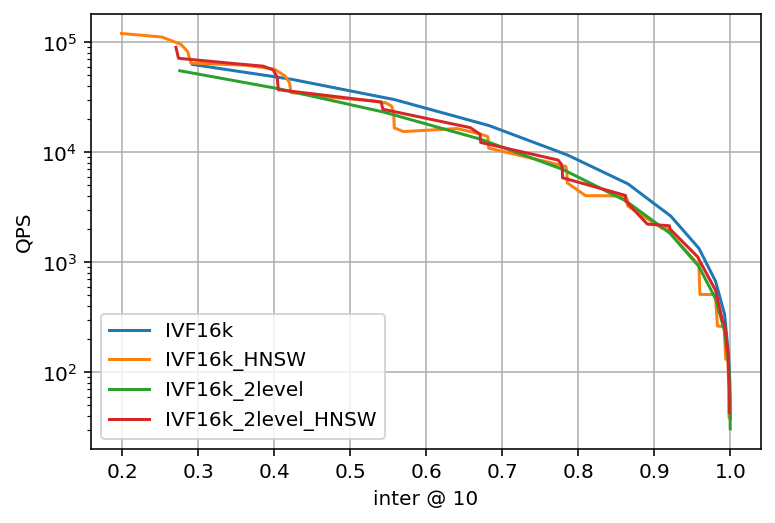

In [5]:
for key in "IVF16k", "IVF16k_HNSW", "IVF16k_2level", "IVF16k_2level_HNSW": 
    

    indexkey, res, keys, stats = parse_result_file(find_latest_version(
                f"../logs/{dsname}.{key}.b.log"))
    
    if res.size == 0: 
        print("skip", key)
        continue
    
    r10 = res[:, 0]
    qps = 1000 / res[:, 1]
    
    pyplot.semilogy(r10, qps, label=key)


pyplot.xlabel("inter @ 10")
pyplot.ylabel("QPS")
pyplot.legend()
pyplot.grid()

It performs pretty well, even in combination with HNSW and 2-level encoding. 

# Compression 

Here we fix the coarse quantizer and evaluate compression options

IVF16k
IVF16k,PQ48
IVF16k,PQ64
IVF16k,RR192_PQ32
IVF16k,SQ4
IVF16k,SQ4_PCAR100
IVF16k,SQ6
IVF16k,SQ6_nores
skip IVF16k,SQ6_nores
IVF16k,SQ8
IVF16k,SQ8_PQ32
IVF16k,SQ8_PQ32_nores
skip IVF16k,SQ8_PQ32_nores
IVF16k,SQ8_nores
skip IVF16k,SQ8_nores


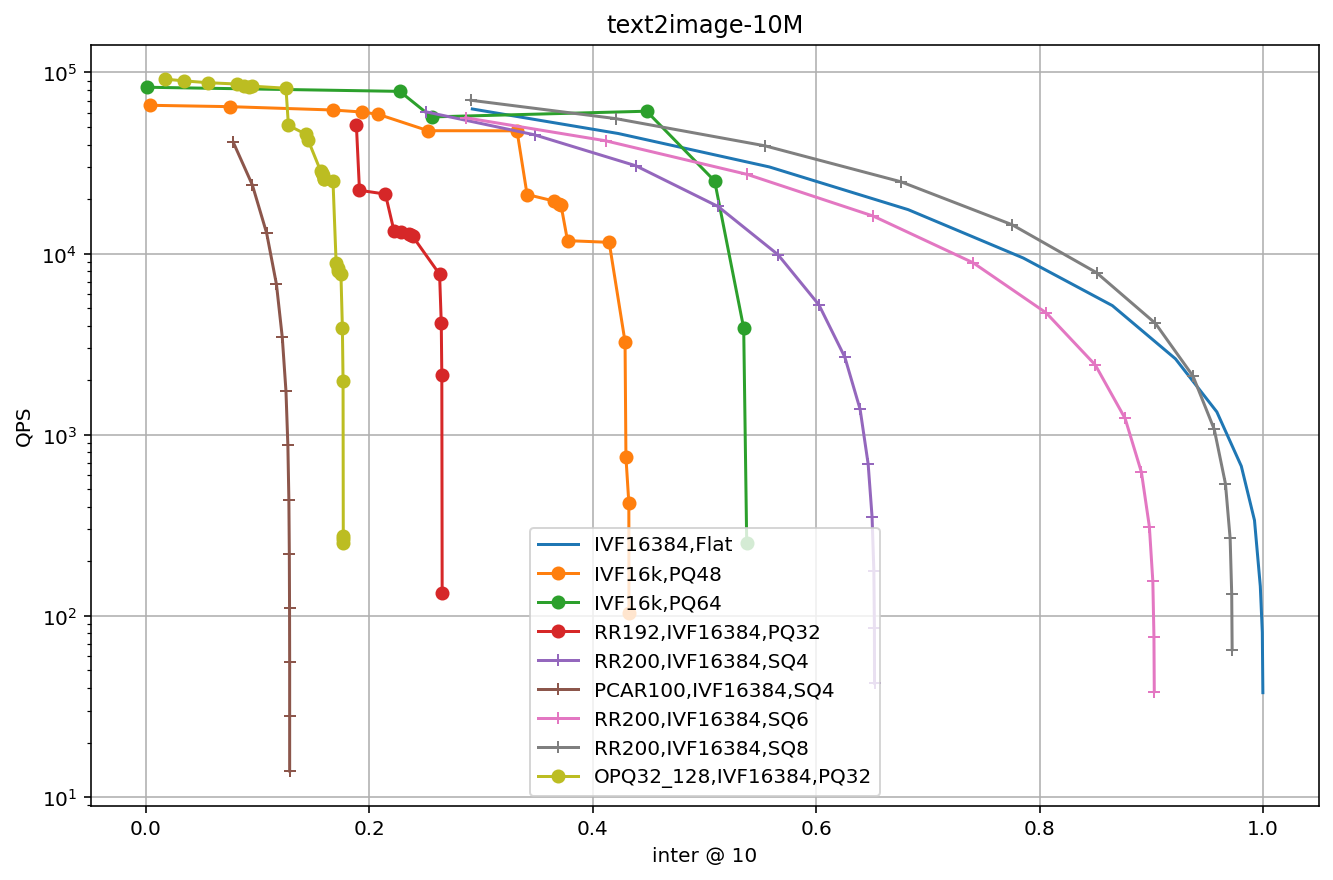

In [13]:
allkeys="""
IVF16k IVF16k,SQ8 IVF16k,SQ8_nores 
IVF16k,SQ6 IVF16k,SQ6_nores 
IVF16k,SQ8_PQ32 IVF16k,SQ8_PQ32_nores 
IVF16k,SQ4 IVF16k,SQ4_PCAR100 
IVF16k,RR192_PQ32 IVF16k,PQ64 IVF16k,PQ48"""

for key in sorted(allkeys.split()): 
    print(key)
    indexkey, res, keys, stats = parse_result_file(find_latest_version(
                f"../logs/{dsname}.{key}.b.log"))
    
    if res.size == 0 or "nores" in key: 
        print("skip", key)
        continue
    
    r10 = res[:, 0]
    qps = 1000 / res[:, 1]
    
    pyplot.semilogy(
        r10, qps, 
        'o-' if "PQ" in key else 
        "+-" if "SQ" in key else "-", 
        label=indexkey or key)

pyplot.title(dsname)
pyplot.xlabel("inter @ 10")
pyplot.ylabel("QPS")
pyplot.legend()
pyplot.grid()
pyplot.gcf().set_size_inches(11, 7)

In [26]:
indexkey